In [33]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import StratifiedKFold,GridSearchCV
import lightgbm as lgb
from sklearn.model_selection import cross_val_score,KFold
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt

In [16]:
train_df = pd.read_csv("./data/mushroom_train.csv", encoding="utf-8")
test_df = pd.read_csv("./data/mushroom_test.csv", encoding="utf-8")

df = pd.concat([train_df, test_df]).reset_index(drop=True)

1. 데이터 컬럼 및 개수 파악

In [17]:
df.shape

(8124, 24)

2. 데이터 컬림 이름 파악

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   mushroom_id               8124 non-null   int64 
 1   class                     6500 non-null   object
 2   cap-shape                 8124 non-null   object
 3   cap-surface               8124 non-null   object
 4   cap-color                 8124 non-null   object
 5   bruises                   8124 non-null   object
 6   odor                      8124 non-null   object
 7   gill-attachment           8124 non-null   object
 8   gill-spacing              8124 non-null   object
 9   gill-size                 8124 non-null   object
 10  gill-color                8124 non-null   object
 11  stalk-shape               8124 non-null   object
 12  stalk-root                8124 non-null   object
 13  stalk-surface-above-ring  8124 non-null   object
 14  stalk-surface-below-ring

3. 데이터 null 갑 파악

In [19]:
df.isnull().sum()

mushroom_id                    0
class                       1624
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                     0
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

4. 데이터 컬럼 내용 파악  -  불필요한 데이터 삭제

In [20]:
df.select_dtypes('object').nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [21]:
df.nunique()

mushroom_id                 8124
class                          2
cap-shape                      6
cap-surface                    4
cap-color                     10
bruises                        2
odor                           9
gill-attachment                2
gill-spacing                   2
gill-size                      2
gill-color                    12
stalk-shape                    2
stalk-root                     5
stalk-surface-above-ring       4
stalk-surface-below-ring       4
stalk-color-above-ring         9
stalk-color-below-ring         9
veil-type                      1
veil-color                     4
ring-number                    3
ring-type                      5
spore-print-color              9
population                     6
habitat                        7
dtype: int64

5. 데이터 삭제 :  veil-type : 값 1개여서 지움

In [22]:
# 값이 1개여서 지움
df = df.drop(['veil-type'],axis=1)

# mushroom_2_trial 에서 plot_importance(model) 에 없어서 지움

df = df.drop(['cap-shape','gill-attachment','veil-color','ring-type'],axis=1)

6. laber encoder 사용

In [23]:
# label encoder
# class : { 0 : e , 1 : p , 2 : nan}

label_encoder = LabelEncoder()

name_columns = ['class', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'ring-number',
       'spore-print-color', 'population', 'habitat']

for name in name_columns:
    df[name] = label_encoder.fit_transform(df[name])

7. train, test set 분리

In [24]:
train_df = df[:6500]
test_df = df[6500:]

8. 종속변수, 독립변수 분리

In [25]:
test_df = test_df.drop(["class"],axis=1)

In [26]:
x_train = train_df.drop(['mushroom_id','class'],axis=1)
y_train = train_df['class']
x_test = test_df.drop(['mushroom_id'],axis=1)

9. Deicision Tree 학습

In [41]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=51,
    criterion='entropy',
    max_depth=4,
    random_state=1234
)

In [28]:
kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=1234)

In [29]:
scores = cross_val_score(model,x_train,y_train,cv=kf)

In [43]:
scores

array([0.98307692, 0.99230769, 0.98538462, 0.98769231, 0.98923077])

In [44]:
scores.mean()

0.9875384615384615

In [42]:
model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=4, n_estimators=51,
                       random_state=1234)

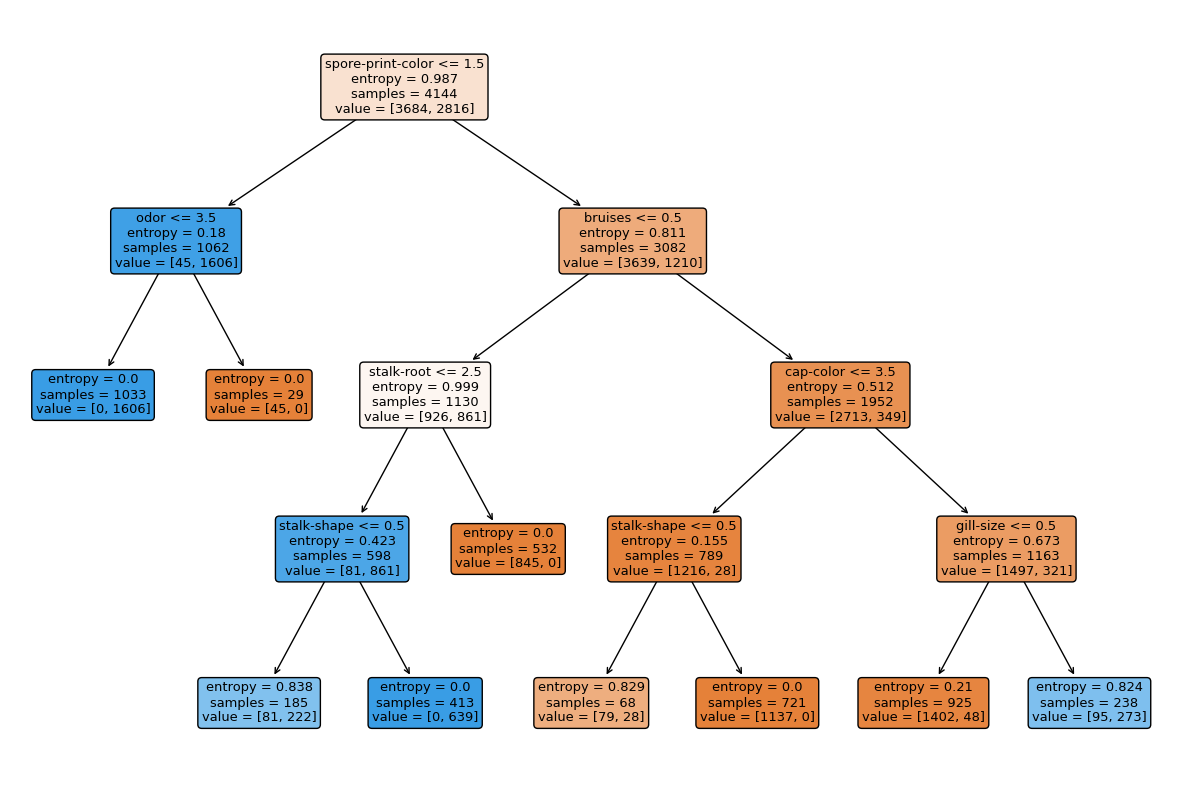

In [57]:
feature_names = x_train.columns.to_list()
plt.figure(figsize=(15,10))
_=plot_tree(
    model.estimators_[8],
    feature_names=feature_names,
    filled=True,
    rounded=True
)

In [ ]:
y_test_pred = model.predict(x_test)
test_df['class'] = y_test_pred
test_df["class"] = test_df["class"].replace([1,0],["p","e"])

In [ ]:
test_df[['mushroom_id','class']].to_csv('./data/mushroom_submission_4.csv',index=False)